I. Importing essential libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score
%matplotlib inline
from sklearn.model_selection import learning_curve
import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['#AOforever 1.jpg', '#AOforever 2.jpg', '#AOforever [b].jpg', '#AOforever.jpg', '-Cyber Security-ASSIGNMENT (1) (1).pdf', '.ipynb_checkpoints', '.opera', '000918635_Oluwaseun_Enitan_967_Pre-Admit.pdf', '017301239.pdf', '01_Tools.zip', '02 Supplier Master.xlsx', '026D6ADA-DD3B-4E78-8B93-F112982225C2.pdf', '1-1_extracted_Scanned Documents-1.jpg', '1-s2.0-S1319157822001604-main (1).pdf', '1-s2.0-S1319157822001604-main.pdf', '1-s2.0-S1742287611000326-main.pdf', '1.jpeg', '1.png', '1005KI 1.3.0版本更新说明.xlsx', '12-07-21 PRICE-LIST DOC.docx', '15KVA QUOTE (1).pdf', '15KVA QUOTE.pdf', '1675612945205_INVOICE FOR TERMINATION OF ELV POINTS FOR OLAM-IGANMU v1-20221215.pdf', '1678179868611_1678179789888_1678179667290_Maintenance sheet for firealarm.xlsx', '18-06-439-REP-monero-bulletproof-sec-assessment.pdf', '19-07-21 PRICE-LIST DOC.docx', '191218_CHL_Mutual_NDA_2.pdf_-_yenitan1yahoo.zip', '1_updated_CONTROL RM.pdf', '1_updated_DGS-1210_SERIES_REVF_DATASHEET_211_EN_US.pdf', '2-1_extracted_Scanned D

II. Importing and understanding our dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/Phishing_Email.csv")

II. Importing and understanding our dataset

In [ ]:
dataset = pd.read_excel("/content/data.xlsx")

In [ ]:
type(dataset)

In [ ]:
dataset.shape

In [ ]:
dataset.describe()

In [ ]:
dataset.info()

In [ ]:
df = dataset.copy()
# Create a new column 'Label' based on the values in 'Email Type'
df['Email Category'] = df['Email Type'].apply(lambda x: 0 if x == 'Safe Email' else 1)

# Print the modified DataFrame
print(df.head())

In [ ]:
df_new = df.drop(['Email Type'], axis=1)

In [ ]:
# Rename the 'Email Category' column to 'Email Type'
df_new.rename(columns={'Email Category': 'Email Type'}, inplace=True)
dataset = df_new.copy()
data = df_new.copy()
print(data.head())

In [ ]:
def read_data(file_path):
    data = pd.read_csv(file_path, encoding='latin-1')
    data.dropna(inplace=True)

    label_encoder = LabelEncoder()
    T_vectorizer = TfidfVectorizer(sublinear_tf=True, ngram_range=(1, 2), max_features=5000)

    X = data['Email Text'].values
    y = data['Email Type'].values

    for i in range(len(y)):
        if y[i] == 'Phishing Email':
            y[i] = 1
        else:
            y[i] = 0

    X = T_vectorizer.fit_transform(X)
    y = label_encoder.fit_transform(y)
    return X, y


def print_report(y_val, y_pred, fold):
    print(f'Fold: {fold}')
    print(f'Accuracy Score: {accuracy_score(y_val, y_pred)}')
    print(f'Confusion Matrix: \n {confusion_matrix(y_val, y_pred)}')
    print(f'Classification Report: \n {classification_report(y_val, y_pred)}')

In [ ]:
# data set preview
data = dataset.copy()
print(data.head())
print(data['Email Type'].value_counts())

In [ ]:
!pip install numpy==1.22.3

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

In [ ]:
dataset['Email Text'].isnull().sum()

In [ ]:
dataset['Email Type'].isnull().sum()

In [ ]:
print(dataset.head())

In [ ]:
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 18650):
    email = re.sub('[^a-zA-Z]', ' ', str(dataset['Email Text'][i]))
    email = email.lower()
    email = email.split()
    ps = PorterStemmer()
    email = [ps.stem(word) for word in email if word not in set(stop_words)]
    email = ' '.join(email)
    corpus.append(email)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 18000)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
y

In [5]:
X

NameError: name 'X' is not defined

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 40)

NameError: name 'X' is not defined

Naive Bayes

In [7]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

NameError: name 'X_train' is not defined

In [8]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

NameError: name 'X_test' is not defined

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

NameError: name 'y_test' is not defined

Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()

lor.fit(X_train,y_train)

Y_pred_lor = lor.predict(X_test)

NameError: name 'X_train' is not defined

In [ ]:
cm = confusion_matrix(y_test, Y_pred_lor)
print(cm)
accuracy_score(y_test, Y_pred_lor)

In [11]:
print(classification_report(y_test, Y_pred_lor))

NameError: name 'y_test' is not defined

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_lor = lor.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_lor)

# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


NameError: name 'X_test' is not defined

Gradient Boosting Machines

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gbm = GradientBoostingClassifier()

gbm.fit(X_train, y_train)

GradientBoostingClassifier()

In [ ]:

Y_pred_gbm = gbm.predict(X_test)

print("Accuracy score: {:.2f}".format(accuracy_score(y_test, Y_pred_gbm)))
print(classification_report(y_test, Y_pred_gbm))


Accuracy score: 0.93
              precision    recall  f1-score   support

           0       0.96      0.93      0.95      2273
           1       0.90      0.94      0.92      1457

    accuracy                           0.93      3730
   macro avg       0.93      0.93      0.93      3730
weighted avg       0.94      0.93      0.93      3730



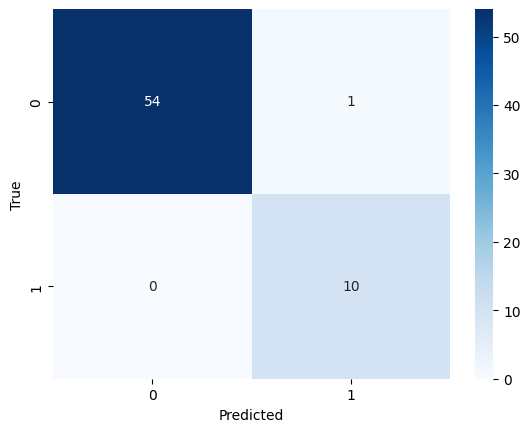

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_gbm = gbm.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_gbm)

# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Xgboost

In [ ]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:

Y_pred_xgb = xgb_model.predict(X_test)
print(classification_report(y_test, Y_pred_xgb))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97      2273
           1       0.93      0.98      0.95      1457

    accuracy                           0.96      3730
   macro avg       0.96      0.97      0.96      3730
weighted avg       0.96      0.96      0.96      3730



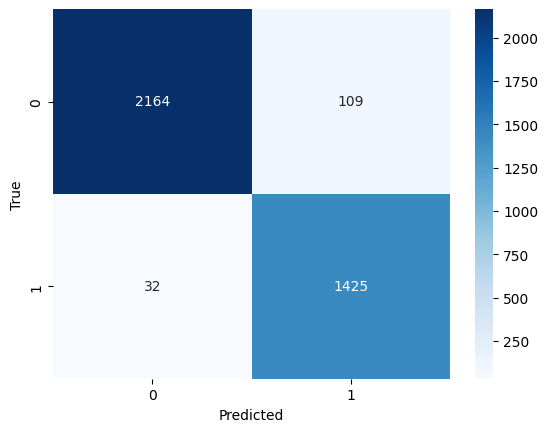

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_xgb = xgb_model.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_xgb)

# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


SVM

In [ ]:
from sklearn import svm

svm = svm.SVC(kernel='linear')

svm.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
Y_pred_svm = svm.predict(X_test)
print(classification_report(y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2273
           1       0.93      0.97      0.95      1457

    accuracy                           0.96      3730
   macro avg       0.96      0.96      0.96      3730
weighted avg       0.96      0.96      0.96      3730



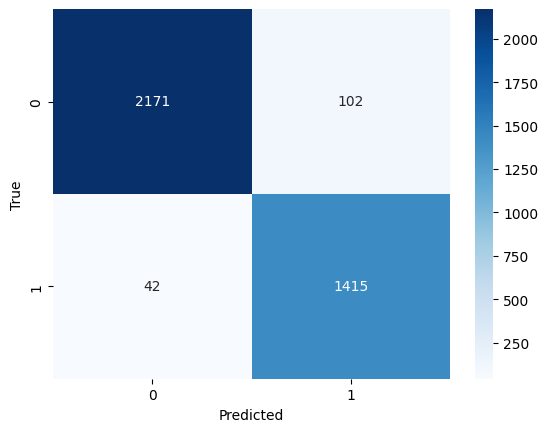

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_svm = svm.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_svm)

# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


DT

In [ ]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(20):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,y_train)

DecisionTreeClassifier(random_state=3)

In [ ]:
Y_pred_dt = dt.predict(X_test)
print(classification_report(y_test, Y_pred_dt))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      2273
           1       0.89      0.93      0.91      1457

    accuracy                           0.93      3730
   macro avg       0.92      0.93      0.92      3730
weighted avg       0.93      0.93      0.93      3730



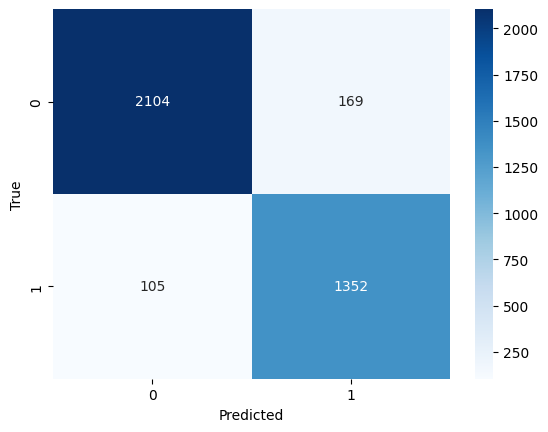

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_dt = dt.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_dt)

# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


RF

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(20):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=17)

In [ ]:
Y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, Y_pred_rf))


              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2273
           1       0.95      0.97      0.96      1457

    accuracy                           0.97      3730
   macro avg       0.96      0.97      0.97      3730
weighted avg       0.97      0.97      0.97      3730



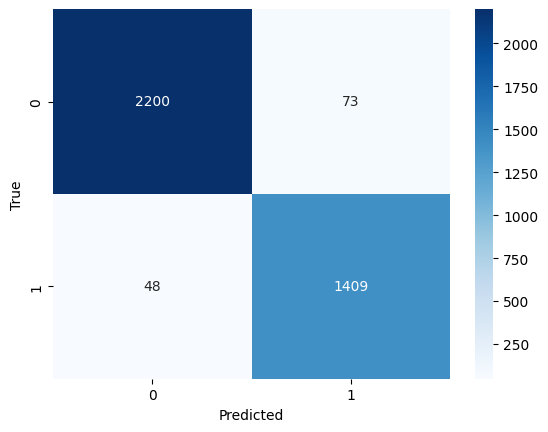

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_rf = rf.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_rf)

# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# create AdaBoost model
adaboost = AdaBoostClassifier()

# train the model on the training set
adaboost.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
# predict on the test set
Y_pred_adaboost = adaboost.predict(X_test)

# print accuracy score
accuracy = accuracy_score(y_test, Y_pred_adaboost)
print("Accuracy:", accuracy)

# print classification report
report = classification_report(y_test, Y_pred_adaboost)
print("classification_report\n\n", report)

Accuracy: 0.9061662198391421
classification_report

               precision    recall  f1-score   support

           0       0.95      0.90      0.92      2273
           1       0.85      0.92      0.88      1457

    accuracy                           0.91      3730
   macro avg       0.90      0.91      0.90      3730
weighted avg       0.91      0.91      0.91      3730



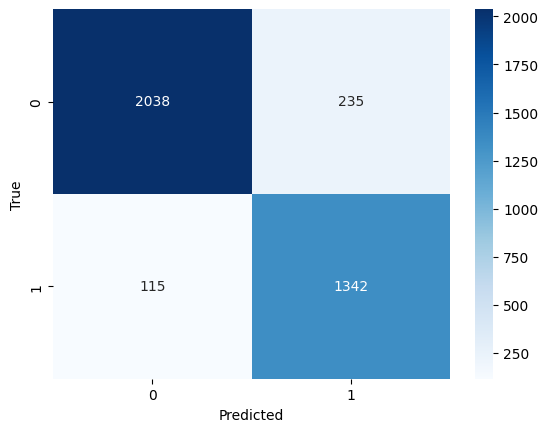

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_adaboost = adaboost.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_adaboost )

# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


CatBoost

In [ ]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.7 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# create an instance of the model
cat = CatBoostClassifier()

# train the model
cat.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.061777
0:	learn: 0.6371745	test: 0.6371160	best: 0.6371160 (0)	total: 391ms	remaining: 6m 31s
1:	learn: 0.5960558	test: 0.5963183	best: 0.5963183 (1)	total: 770ms	remaining: 6m 24s
2:	learn: 0.5733611	test: 0.5726777	best: 0.5726777 (2)	total: 1.19s	remaining: 6m 35s
3:	learn: 0.5467099	test: 0.5460761	best: 0.5460761 (3)	total: 1.6s	remaining: 6m 39s
4:	learn: 0.5265447	test: 0.5259247	best: 0.5259247 (4)	total: 2.04s	remaining: 6m 45s
5:	learn: 0.5143170	test: 0.5139946	best: 0.5139946 (5)	total: 2.47s	remaining: 6m 49s
6:	learn: 0.5025903	test: 0.5023742	best: 0.5023742 (6)	total: 2.88s	remaining: 6m 49s
7:	learn: 0.4874526	test: 0.4867927	best: 0.4867927 (7)	total: 3.29s	remaining: 6m 48s
8:	learn: 0.4770608	test: 0.4758915	best: 0.4758915 (8)	total: 3.69s	remaining: 6m 46s
9:	learn: 0.4615021	test: 0.4609650	best: 0.4609650 (9)	total: 4.09s	remaining: 6m 44s
10:	learn: 0.4521679	test: 0.4513133	best: 0.4513133 (10)	total: 4.47s	remaining: 6m 41s
11:	learn: 0

In [ ]:
# make predictions
Y_pred_cat = cat.predict(X_test)

# print the accuracy score and classification report
print("Accuracy score:", cat.score(X_test, y_test))
print(classification_report(y_test, Y_pred_cat))

Accuracy score: 0.9662198391420912
              precision    recall  f1-score   support

           0       0.99      0.96      0.97      2273
           1       0.94      0.98      0.96      1457

    accuracy                           0.97      3730
   macro avg       0.96      0.97      0.96      3730
weighted avg       0.97      0.97      0.97      3730



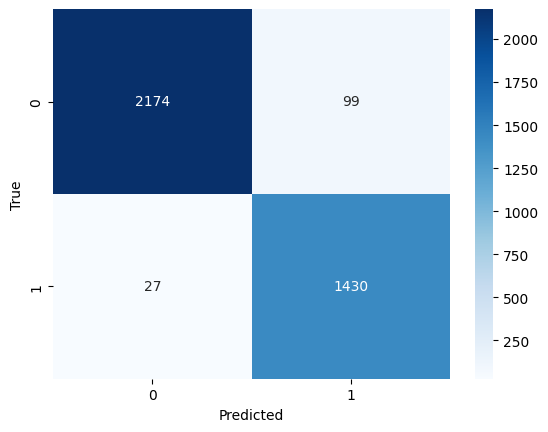

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# predict on test set
Y_pred_cat = cat.predict(X_test)

# create confusion matrix
cm = confusion_matrix(y_test, Y_pred_cat)

# plot confusion matrix using seaborn heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
score_lor = 97.2386
score_svm = 96.1394
score_rf = 96.756
score_xgb = 96.2198
score_cat = 96.622

# Define the data
scores = [score_lor, score_svm, score_rf, score_xgb, score_cat]
algorithms = ["Logistic Regression", "Support Vector Machine", "Random Forest", "Xgboost", "CatBoost"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using " + algorithms[i] + " is: " + str(scores[i]) + " %")


The accuracy score achieved using Logistic Regression is: 97.2386 %
The accuracy score achieved using Support Vector Machine is: 96.1394 %
The accuracy score achieved using Random Forest is: 96.756 %
The accuracy score achieved using Xgboost is: 96.2198 %
The accuracy score achieved using CatBoost is: 96.622 %


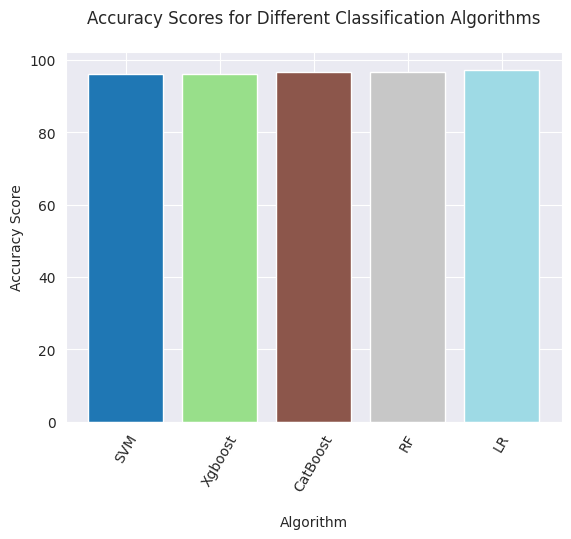

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
scores = [score_lor, score_svm, score_rf, score_xgb, score_cat]
algorithms = ["LR", "SVM", "RF", "Xgboost", "CatBoost"]

# Sort the scores in descending order
sorted_scores, sorted_algorithms = zip(*sorted(zip(scores, algorithms), reverse=False))

# Define the colors
colors = plt.cm.tab20(np.linspace(0, 1, len(algorithms)))

# Set the style to use a dark grid
sns.set_style("darkgrid")

# Create the vertical bar plot
fig, ax = plt.subplots()
ax.bar(sorted_algorithms, sorted_scores, color=colors, width=0.8)

# Set the x-axis label and the y-axis label
ax.set_xlabel('\nAlgorithm')
ax.set_ylabel('Accuracy Score')

# Set the title of the plot
ax.set_title('Accuracy Scores for Different Classification Algorithms\n')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()


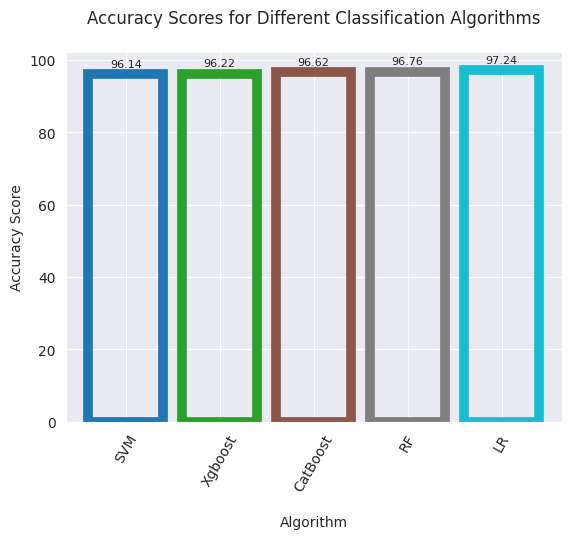

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data
scores = [score_lor, score_svm, score_rf, score_xgb, score_cat]
algorithms = ["LR", "SVM", "RF", "Xgboost", "CatBoost"]

# Sort the scores in descending order
sorted_scores, sorted_algorithms = zip(*sorted(zip(scores, algorithms), reverse=False))

# Define the colors
colors = plt.cm.tab10(np.linspace(0, 1, len(algorithms)))

# Set the style to use no grid
sns.set_style("darkgrid")

# Create the first bar plot with hollow bars
fig, ax = plt.subplots()
bars = ax.bar(sorted_algorithms, sorted_scores, color='none', edgecolor=colors, width=0.8, linewidth=7)

# Add text labels with the scores on top of each bar
for bar, score in zip(bars, sorted_scores):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1.4, round(score, 2), ha='center', va='bottom', fontsize=8)

# Set the x-axis label and the y-axis label
ax.set_xlabel('\nAlgorithm')
ax.set_ylabel('Accuracy Score')

# Set the title of the plot
ax.set_title('Accuracy Scores for Different Classification Algorithms\n')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=60)

# Show the plot
plt.show()


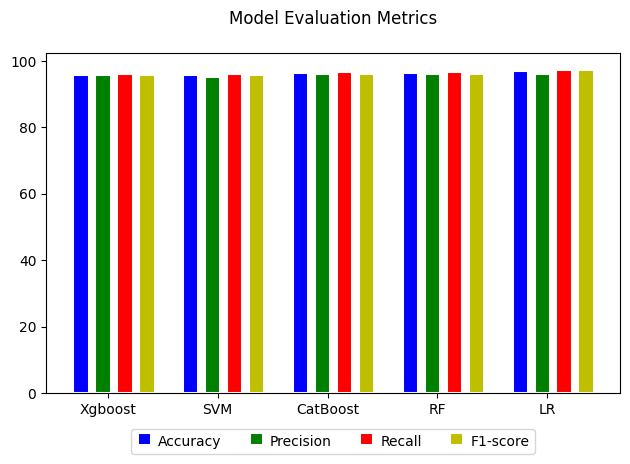

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Performance measures for each model and class
models = ['Xgboost', 'SVM', 'CatBoost', 'RF', 'LR']
# classes = ['Normal', 'Mild', 'Moderate', 'Severe']
accuracy = [96.1394, 96.2198, 96.622, 96.756, 97.2386]
precision = [96, 95.5, 96.5, 96.5, 96.5]
recall = [96.5, 96.5, 97, 97, 97.5]
f1_score = [96, 96, 96.5, 96.5, 97.5]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width + 0.05 for x in r1]
r3 = [x + 2*bar_width + 0.1 for x in r1]
r4 = [x + 3*bar_width + 0.15 for x in r1]  # Adjust the offset here

# Create the bar chart
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='white', linewidth=2.2, label='Accuracy')
plt.bar(r2, precision, width=bar_width, color='g', edgecolor='white', linewidth=2.2, label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='white', linewidth=2.2, label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='white', linewidth=2.2, label='F1-score')

# Add x-axis labels and tick labels
plt.xlabel('')
plt.ylabel('')
plt.title('Model Evaluation Metrics\n')

# Customize x-axis tick labels
plt.xticks(r1 + 1.5*bar_width + 0.025, models)  # Adjust the offset here

# Add a legend as a horizontal line below the plot
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, handlelength=1, handletextpad=0.5)

# Set the size of the bars in the legend to make them square
for handle in legend.legendHandles:
    handle.set_height(10)  # Adjust the size here
    handle.set_width(10)  # Adjust the size here

# Display the chart
plt.tight_layout()
plt.show()


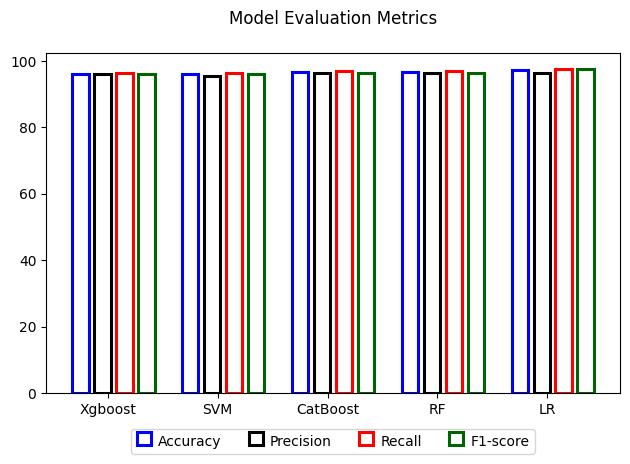

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Performance measures for each model and class
models = ['Xgboost', 'SVM', 'CatBoost', 'RF', 'LR']
# classes = ['Normal', 'Mild', 'Moderate', 'Severe']
accuracy = [96.1394, 96.2198, 96.622, 96.756, 97.2386]
precision = [96, 95.5, 96.5, 96.5, 96.5]
recall = [96.5, 96.5, 97, 97, 97.5]
f1_score = [96, 96, 96.5, 96.5, 97.5]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width + 0.05 for x in r1]
r3 = [x + 2*bar_width + 0.1 for x in r1]
r4 = [x + 3*bar_width + 0.15 for x in r1]  # Adjust the offset here

# Create the bar chart
plt.bar(r1, accuracy, color='none', width=bar_width, edgecolor='b', linewidth=2.2, label='Accuracy')
plt.bar(r2, precision, width=bar_width, color='none', edgecolor='black', linewidth=2.2, label='Precision')
plt.bar(r3, recall, color='none', width=bar_width, edgecolor='r', linewidth=2.2, label='Recall')
plt.bar(r4, f1_score, color='none', width=bar_width, edgecolor='darkgreen', linewidth=2.2, label='F1-score')

# Add x-axis labels and tick labels
plt.xlabel('')
plt.ylabel('')
plt.title('Model Evaluation Metrics\n')

# Customize x-axis tick labels
plt.xticks(r1 + 1.5*bar_width + 0.025, models)  # Adjust the offset here

# Add a legend as a horizontal line below the plot
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, handlelength=1, handletextpad=0.5)

# Set the size of the bars in the legend to make them square
for handle in legend.legendHandles:
    handle.set_height(10)  # Adjust the size here
    handle.set_width(10)  # Adjust the size here

# Display the chart
plt.tight_layout()
plt.show()


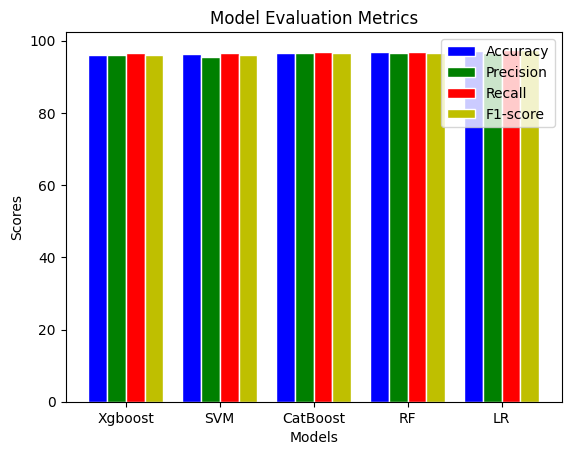

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Performance measures for each model and class
models = ['Xgboost', 'SVM', 'CatBoost', 'RF', 'LR']
# classes = ['Normal', 'Mild', 'Moderate', 'Severe']
accuracy = [96.1394, 96.2198, 96.622, 96.756, 97.2386]
precision = [96, 95.5, 96.5, 96.5, 96.5]
recall = [96.5, 96.5, 97, 97, 97.5]
f1_score = [96, 96, 96.5, 96.5, 97.5]


# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]
r4 = [x + 3*bar_width for x in r1]

# Create the bar chart
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='white', label='F1-score')

# Add x-axis labels and tick labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')

# Customize x-axis tick labels
plt.xticks([r + 1.5*bar_width for r in range(len(models))], models)

# Add a legend
plt.legend()

# Display the chart
plt.show()

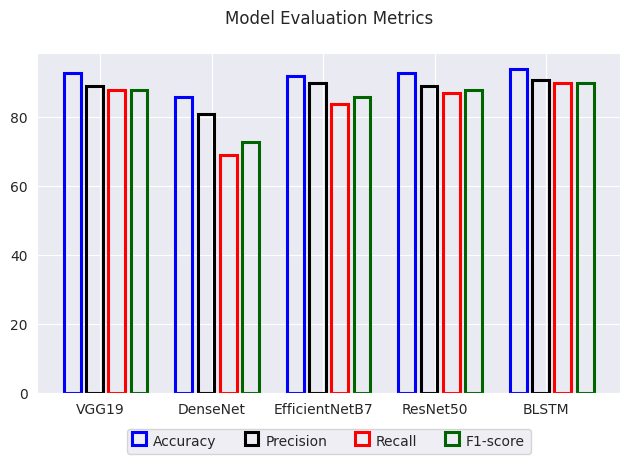

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Performance measures for each model and class
models = ['Xgboost', 'SVM', 'CatBoost', 'RF', 'LR']
# classes = ['Normal', 'Mild', 'Moderate', 'Severe']
accuracy = [96.1394, 96.2198, 96.622, 96.756, 97.2386]
precision = [89, 81, 90, 89, 91]
recall = [88, 69, 84, 87, 90]
f1_score = [88, 73, 86, 88, 90]

# Set the width of the bars
bar_width = 0.15

# Set the positions of the bars on the x-axis
r1 = np.arange(len(models))
r2 = [x + bar_width + 0.05 for x in r1]
r3 = [x + 2*bar_width + 0.1 for x in r1]
r4 = [x + 3*bar_width + 0.15 for x in r1]  # Adjust the offset here

# Create the bar chart
plt.bar(r1, accuracy, color='none', width=bar_width, edgecolor='b', linewidth=2.2, label='Accuracy')
plt.bar(r2, precision, width=bar_width, color='none', edgecolor='black', linewidth=2.2, label='Precision')
plt.bar(r3, recall, color='none', width=bar_width, edgecolor='r', linewidth=2.2, label='Recall')
plt.bar(r4, f1_score, color='none', width=bar_width, edgecolor='darkgreen', linewidth=2.2, label='F1-score')

# Add x-axis labels and tick labels
plt.xlabel('')
plt.ylabel('')
plt.title('Model Evaluation Metrics\n')

# Customize x-axis tick labels
plt.xticks(r1 + 1.5*bar_width + 0.025, models)  # Adjust the offset here

# Add a legend as a horizontal line below the plot
legend = plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=4, handlelength=1, handletextpad=0.5)

# Set the size of the bars in the legend to make them square
for handle in legend.legendHandles:
    handle.set_height(10)  # Adjust the size here
    handle.set_width(10)  # Adjust the size here

# Display the chart
plt.tight_layout()
plt.show()


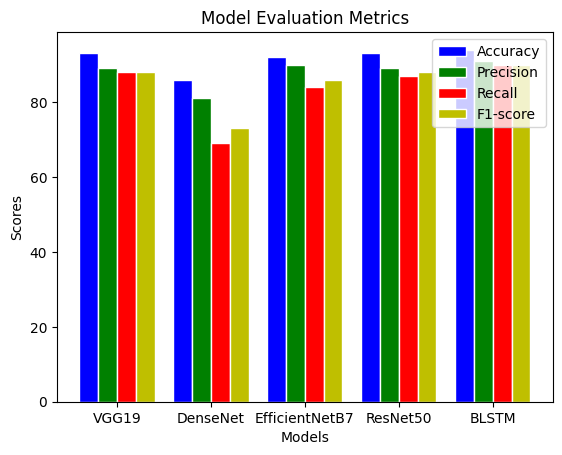

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Performance measures for each model and class
models = ['Xgboost', 'SVM', 'CatBoost', 'RF', 'LR']
# classes = ['Normal', 'Mild', 'Moderate', 'Severe']
accuracy = [96.1394, 96.2198, 96.622, 96.756, 97.2386]
precision = [96, 95.5, 96.5, 96.5, 96.5]
recall = [96.5, 96.5, 97, 97, 97.5]
f1_score = [96, 96, 96.5, 96.5, 97.5]


# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
r1 = range(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]
r4 = [x + 3*bar_width for x in r1]

# Create the bar chart
plt.bar(r1, accuracy, color='b', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, precision, color='g', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, recall, color='r', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, f1_score, color='y', width=bar_width, edgecolor='white', label='F1-score')

# Add x-axis labels and tick labels
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Evaluation Metrics')

# Customize x-axis tick labels
plt.xticks([r + 1.5*bar_width for r in range(len(models))], models)

# Add a legend
plt.legend()

# Display the chart
plt.show()

In [ ]:
import joblib

# Assuming 'lor' is your trained LogisticRegression model
joblib.dump(lor, 'phishing_model.pkl')


['phishing_model.pkl']

In [ ]:
# Load the trained model
loaded_model = joblib.load('phishing_model.pkl')

# Now you can use 'loaded_model' to make predictions


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Download NLTK stopwords (only needs to be done once)
nltk.download('stopwords')

# Load the trained Logistic Regression model
model = joblib.load('phishing_model.pkl')

# Preprocessing function
def preprocess_email(email_text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    email = re.sub('[^a-zA-Z]', ' ', email_text)
    email = email.lower()
    email = email.split()
    email = [ps.stem(word) for word in email if word not in stop_words]
    email = ' '.join(email)
    return email

# Example new email text
new_email_text = "webcam dating is hot - - - - - - - - - - - - - - - - please no more"
preprocessed_email = preprocess_email(new_email_text)

# Load CountVectorizer and transform preprocessed email
cv = CountVectorizer(vocabulary=cv.vocabulary_)  # Use the same vocabulary as in training
X_new = cv.transform([preprocessed_email]).toarray()

# Make a prediction using the trained model
predicted_prob = model.predict_proba(X_new)[:, 1]  # Probability of being a phishing email

# Set a threshold (adjust as needed)
threshold = 0.5

# Determine email classification
classification = "Phishing Email" if predicted_prob > threshold else "Safe Email"

# Print the formatted output
print("=" * 40)
print("Email Text:")
print(new_email_text)
print("=" * 40)
print("Preprocessed Email:")
print(preprocessed_email)
print("=" * 40)
print("Classification:", classification)
print("=" * 40)


Email Text:
webcam dating is hot - - - - - - - - - - - - - - - - please no more
Preprocessed Email:
webcam date hot pleas
Classification: Phishing Email


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Download NLTK stopwords (only needs to be done once)
nltk.download('stopwords')

# Load the trained Logistic Regression model
model = joblib.load('phishing_model.pkl')

# Preprocessing function
def preprocess_email(email_text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    email = re.sub('[^a-zA-Z]', ' ', email_text)
    email = email.lower()
    email = email.split()
    email = [ps.stem(word) for word in email if word not in stop_words]
    email = ' '.join(email)
    return email

# Example new email text
new_email_text = "webcam dating is hot - - - - - - - - - - - - - - - - please no more"
preprocessed_email = preprocess_email(new_email_text)

# Load CountVectorizer and transform preprocessed email
cv = CountVectorizer(vocabulary=cv.vocabulary_)  # Use the same vocabulary as in training
X_new = cv.transform([preprocessed_email]).toarray()

# Make a prediction using the trained model
predicted_prob = model.predict_proba(X_new)[:, 1]  # Probability of being a phishing email

# Set a threshold (adjust as needed)
threshold = 0.5

# Determine email classification
classification = "Phishing Email" if predicted_prob > threshold else "Safe Email"

# Print the formatted output
print("=" * 60)
print("Email Text")
print(new_email_text)
print("=" * 60)
print("Classification:", classification)
print("=" * 60)


Email Text
webcam dating is hot - - - - - - - - - - - - - - - - please no more
Classification: Phishing Email


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Download NLTK stopwords (only needs to be done once)
nltk.download('stopwords')

# Load the trained Logistic Regression model
model = joblib.load('phishing_model.pkl')

# Preprocessing function
def preprocess_email(email_text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    email = re.sub('[^a-zA-Z]', ' ', email_text)
    email = email.lower()
    email = email.split()
    email = [ps.stem(word) for word in email if word not in stop_words]
    email = ' '.join(email)
    return email

# Example new email text
new_email_text = "pictures streamlined denizen ajar chased heavens hostesses stolid pinched saturated staten seventeens juggler abashed ice guts centrifugal bauxite wader shyness whirr ukrainian understandingly conditioner barges entitles vanderpoel preset wigwam storming alexei supergroup tab mare birthright brutalize tolerates depots bubbling - - phone : 439 - 120 - 6060 mobile : 590 - 203 - 5805 email : darden . audley @ houston . rr . com"
preprocessed_email = preprocess_email(new_email_text)

# Load CountVectorizer and transform preprocessed email
cv = CountVectorizer(vocabulary=cv.vocabulary_)  # Use the same vocabulary as in training
X_new = cv.transform([preprocessed_email]).toarray()

# Make a prediction using the trained model
predicted_prob = model.predict_proba(X_new)[:, 1]  # Probability of being a phishing email

# Set a threshold (adjust as needed)
threshold = 0.5

# Determine email classification
classification = "Phishing Email" if predicted_prob > threshold else "Safe Email"

# Print the formatted output
print("=" * 60)
print("Email Text")
print(new_email_text)
print("=" * 60)
print("Classification:", classification)
print("=" * 60)


Email Text
pictures streamlined denizen ajar chased heavens hostesses stolid pinched saturated staten seventeens juggler abashed ice guts centrifugal bauxite wader shyness whirr ukrainian understandingly conditioner barges entitles vanderpoel preset wigwam storming alexei supergroup tab mare birthright brutalize tolerates depots bubbling - - phone : 439 - 120 - 6060 mobile : 590 - 203 - 5805 email : darden . audley @ houston . rr . com
Classification: Phishing Email


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Download NLTK stopwords (only needs to be done once)
nltk.download('stopwords')

# Load the trained Logistic Regression model
model = joblib.load('phishing_model.pkl')

# Preprocessing function
def preprocess_email(email_text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    email = re.sub('[^a-zA-Z]', ' ', email_text)
    email = email.lower()
    email = email.split()
    email = [ps.stem(word) for word in email if word not in stop_words]
    email = ' '.join(email)
    return email

# Example new email text
new_email_text = "On Sat, 24 Aug 2002, Adam L. Beberg wrote:--]And yet STILL noone is out there creating _public domain_ content. Is there"
preprocessed_email = preprocess_email(new_email_text)

# Load CountVectorizer and transform preprocessed email
cv = CountVectorizer(vocabulary=cv.vocabulary_)  # Use the same vocabulary as in training
X_new = cv.transform([preprocessed_email]).toarray()

# Make a prediction using the trained model
predicted_prob = model.predict_proba(X_new)[:, 1]  # Probability of being a phishing email

# Set a threshold (adjust as needed)
threshold = 0.5

# Determine email classification
classification = "Phishing Email" if predicted_prob > threshold else "Safe Email"

# Print the formatted output
print("=" * 60)
print("Email Text")
print(new_email_text)
print("=" * 60)
print("Classification:", classification)
print("=" * 60)


Email Text
On Sat, 24 Aug 2002, Adam L. Beberg wrote:--]And yet STILL noone is out there creating _public domain_ content. Is there
Classification: Safe Email


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
import joblib

# Download NLTK stopwords (only needs to be done once)
nltk.download('stopwords')

# Load the trained Logistic Regression model
model = joblib.load('phishing_model.pkl')

# Preprocessing function
def preprocess_email(email_text):
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    email = re.sub('[^a-zA-Z]', ' ', email_text)
    email = email.lower()
    email = email.split()
    email = [ps.stem(word) for word in email if word not in stop_words]
    email = ' '.join(email)
    return email

# Example new email text
new_email_text = "Actually, this is common. I've known a couple of people who have suffered this. Believe it or not, you were lucky. You were home, rather than on vacation, and so you didn't have the intake line flowing onto the floor for two weeks."
preprocessed_email = preprocess_email(new_email_text)

# Load CountVectorizer and transform preprocessed email
cv = CountVectorizer(vocabulary=cv.vocabulary_)  # Use the same vocabulary as in training
X_new = cv.transform([preprocessed_email]).toarray()

# Make a prediction using the trained model
predicted_prob = model.predict_proba(X_new)[:, 1]  # Probability of being a phishing email

# Set a threshold (adjust as needed)
threshold = 0.5

# Determine email classification
classification = "Phishing Email" if predicted_prob > threshold else "Safe Email"

# Print the formatted output
print("=" * 60)
print("Email Text")
print(new_email_text)
print("=" * 60)
print("Classification:", classification)
print("=" * 60)


Email Text
Actually, this is common. I've known a couple of people who have suffered this. Believe it or not, you were lucky. You were home, rather than on vacation, and so you didn't have the intake line flowing onto the floor for two weeks.
Classification: Safe Email


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
